# Principal Component Analysis Performance Assessment

### John Foster
### Department of Information Technology, Western Governors University
### D212: Data Mining II
### Professor Keiona Middleton
### June 12, 2023

### A1: PROPOSAL OF QUESTION

The research question I have decided to pursue using the Churn dataset is as follows:

“How effectively can the dimensionality of continuous variables in the Churn dataset be reduced using principal component analysis to maximize computational efficiency in future analyses?”

This research question seeks to provide a way for the organization to reduce infrastructure costs related to data analytics by minimizing the IT resources necessary in performing analysis tasks. This is accomplished because dimensionality reduction in a dataset translates directly to simpler model calculations and faster execution, enabling scalable automation and more affordable costs if on-demand cloud computing solutions are utilized for analysis.

### A2: DEFINED GOAL

As mentioned above, my task in this analysis is to utilize principal component analysis, hereafter referred to as PCA, to reduce the dimensionality of continuous variables in the churn dataset. I am doing this for the purpose of minimizing the complexity of the dataset and maximizing computational efficiency in future organizational analyses performed on this dataset.

The primary metric used to determine the success of our analysis will be the amount of variance explained in the original variables by the reduced number of components. Our goal will be to return a total variance score above 75% while selecting components with eigenvalues above 1.

### B1: EXPLANATION OF PCA

PCA is a common dimensionality reduction technique that takes a number of continuous variables in a dataset and endeavors to reduce their number while retaining as much of the variance of the original features as possible (Larose & Larose, 2019, p. 175).

The first step of this process is to standardize the features selected for PCA. This is accomplished by re-expressing the value of each data point in each feature using the following equation:

standardized value = (raw value - mean of the feature) / standard deviation of the feature

The next step is to generate a covariance matrix for every pairing of included features. This matrix expresses the dependency and relationship between every pair of features. Covariances are expressible through values of -1 to 1, with values close to -1 indicating a negative linear relationship, and values close to 1 indicating a positive linear relationship. A value very near 0 indicates little to no correlation between the features.

Next, we calculate the eigenvalues of the matrix. We accomplish this first by calculating their eigenvectors, meaning the axes (specific combinations of weights for each variable) along which the most variance is explained in the original variables. These eigenvectors are evaluated for the amount of total variance that they explain, returning their eigenvalues. In our analysis, we are selecting eigenvectors with an eigenvalue at or above 1. (Larose & Larose, 2019, p. 177). This selection criteria is known as the Kaiser rule. These eigenvectors become our selected principal components.

Once we have our final principal components, we then evaluate their explained variance ratios, returning the total amount of variance explained by each component. When these results are summed, we can see how much total variance is explained by all of our chosen components. This final score will be the basis of our evaluation for the success of our PCA with regards to our defined goal of 75%.

### B2: PCA ASSUMPTION

One assumption of PCA is that the statistical relationships between variables are linear in nature. This assumption is critical to the effective derivation of eigenvectors (which are selected to become our final principal components) that maximize the amount of explained variance in the original features. This is because eigenvectors, and the feature-specific weights assigned to the calculations that comprise them, are generated from a covariance matrix, which by definition quantifies the linear relationships between the quantitative features included in a PCA. Essentially, the entire process of principal component analysis is predicated on the existence of linear relationships between numeric features.

### C1: CONTINUOUS DATASET VARIABLES

The continuous variables selected for inclusion in our analysis are as follows:

'Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', and 'Bandwidth_GB_Year'.

### C2: STANDARDIZATION OF DATASET VARIABLES

We will now process our initial data as we described in section B1 and standardize the continuous variables for use in our PCA. We will then export the cleaned dataset to a .csv file.

The following code will be used to process standardize the numeric features in the dataset and export the data:

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [61]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 250)

df = pd.read_csv('churn_clean.csv')

#We will start by making a new dataframe to hold our PCA values.
PCA_df = pd.DataFrame()

#Create a list of all column names in the dataframe
df_cols = df.columns.to_list()

#Make a list out of the numeric columns
num_cols = ['Lat', 
            'Lng', 
            'Population', 
            'Children', 
            'Age', 
            'Income', 
            'Outage_sec_perweek', 
            'Email', 
            'Contacts', 
            'Yearly_equip_failure', 
            'Tenure', 
            'MonthlyCharge', 
            'Bandwidth_GB_Year']

#Copy our natively numeric columns over to our new dataframe from our completed df.
for col in num_cols:
    PCA_df[col] = df[col]

#Standardize our data.
pca_norm = (PCA_df - PCA_df.mean()) / PCA_df.std()
pca_count = PCA_df.shape[1]


In [62]:
pca_norm.to_csv('PCA_cleaned.csv', index=False)

### D1: PRINCIPAL COMPONENTS

The following code returns the covariance matrix of our initial 13 principal components:

In [63]:
#Return the number of components that will be generated in our analysis.
pca = PCA(n_components=pca_count)
pca.fit(pca_norm)
print(pca)

PCA(n_components=13)


In [64]:
cols = []
for i in range(pca_count):
    cols.append("PC" + str(i+1))
print(cols)
loadings = pd.DataFrame(pca.components_.T,
     columns=cols,
     index=PCA_df.columns)

print(loadings)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13']
                           PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8       PC9      PC10      PC11      PC12      PC13
Lat                  -0.023161 -0.714010 -0.031715  0.109414 -0.094872 -0.030887 -0.010719 -0.020375  0.090273  0.018619  0.053958  0.674376  0.001077
Lng                   0.007911  0.180879 -0.285753 -0.736871  0.344620 -0.087695 -0.052349 -0.086499 -0.172285 -0.151301 -0.112280  0.375138  0.000788
Population           -0.001230  0.653439  0.151916  0.322012 -0.119517  0.098791  0.053682  0.079161 -0.027392  0.055304  0.100818  0.631729 -0.000070
Children              0.014244 -0.014267  0.447882 -0.464670 -0.107498  0.130597  0.034812 -0.065531  0.192459  0.437471  0.565626 -0.011794 -0.021597
Age                   0.001860  0.052795 -0.443537  0.227235  0.436759 -0.096321 -0.188399  0.093484  0.342892 -0.083596  0.614892 -0.037729  0.02236

### D2: IDENTIFICATION OF TOTAL NUMBER OF COMPONENTS

The following code selects eigenvectors with eigenvalues at or above 1, and returns a total of 6 principal components based on the Kaiser rule:

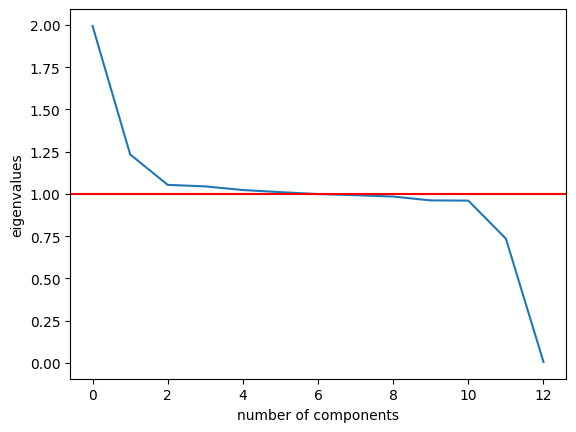

In [65]:
#Now we can perform the PCA.

PCA_df2 = pd.DataFrame(pca.transform(pca_norm), columns=cols)
#Generate our covariance matrix.
cov_matrix = np.dot(pca_norm.T, pca_norm) / PCA_df.shape[0]
#Generate our eigenvalues using our covariance matrix and pca object.
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]
#Code paraphrased from (Larose & Larose, 2019, p. 179-181)

#Visualize the eigenvalues to determine how many components we want to use 
# and also create a horizontal line at y=1 to determine our cutoff point.

plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalues')
plt.axhline(y=1, color='red')
plt.show()

In [66]:
print(eigenvalues)

[1.9945059913117116, 1.23390464654477, 1.0535590324986062, 1.0444855803335102, 1.023083428670593, 1.0105796740381123, 0.9991027291741587, 0.9924766568010988, 0.9843341591240773, 0.9616940372672877, 0.9603032200513495, 0.7352058830233162, 0.005464961161404144]


In [67]:
pca_count = 0
for i in eigenvalues:
    if i >=1:
        pca_count+=1

print("Final number of principal components: " + str(pca_count))

Final number of principal components: 6


####Attribution: 

PCA code and methods used in this assessment are adapted from the following source: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=7b31791b-24e8-4077-ba1a-af5d0005144c (Middleton, 2022).

In [68]:
#Create our PCA class object
mod = 0
pca = PCA(n_components=pca_count+mod)
pca.fit(pca_norm)

#Generate our new loadings
cols = []
for i in range(pca_count+mod):
    cols.append("PC" + str(i+1))
print(cols)
loadings = pd.DataFrame(pca.components_.T,
     columns=cols,
     index=PCA_df.columns)

print(loadings)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
                           PC1       PC2       PC3       PC4       PC5       PC6
Lat                  -0.023161 -0.714010 -0.031715  0.109414 -0.094872 -0.030887
Lng                   0.007911  0.180879 -0.285753 -0.736871  0.344620 -0.087695
Population           -0.001230  0.653439  0.151916  0.322012 -0.119517  0.098791
Children              0.014244 -0.014267  0.447882 -0.464670 -0.107498  0.130597
Age                   0.001860  0.052795 -0.443537  0.227235  0.436759 -0.096321
Income                0.004185 -0.054602  0.195742 -0.041772  0.312779  0.100371
Outage_sec_perweek    0.005811  0.009174 -0.249550 -0.126214 -0.455981  0.597523
Email                -0.020020  0.152355 -0.092711 -0.144998 -0.353186 -0.403463
Contacts              0.004283  0.031043 -0.447906  0.108875  0.011245  0.082442
Yearly_equip_failure  0.017665 -0.007070  0.153686  0.063449  0.420468  0.592380
Tenure                0.705211 -0.008913  0.006569  0.026652  0.00

### D3: TOTAL VARIANCE OF COMPONENTS

The following code returns the variance explained by each of our 6 principal components:

In [69]:
#Return individual variance contributions of our components
var_cont = list(pca.explained_variance_ratio_)
for i in range(pca_count):
    print(cols[i] + ' individual variance contribution: ' + str(var_cont[i]))

PC1 individual variance contribution: 0.153438881681377
PC2 individual variance contribution: 0.094925234565362
PC3 individual variance contribution: 0.08105110761065384
PC4 individual variance contribution: 0.0803530799490341
PC5 individual variance contribution: 0.07870659594194741
PC6 individual variance contribution: 0.07774467247017869


### D4: TOTAL VARIANCE CAPTURED BY COMPONENTS

The following code sums the variances of components returned in part D3 and returns the total variance of the original components captured by our 6 selected components:

In [70]:
total_var = sum(pca.explained_variance_ratio_)
print('Total variance contribution: ' + str(total_var))

Total variance contribution: 0.566219572218553


### D5: SUMMARY OF DATA ANALYSIS

As we can see from the results above, with a total of 6 principal components (from an original 13), we can explain 56.622% of the total variance in the original features. This unfortunately falls well below our defined goal of 75%, which leads us to conclude that this analysis was not a success.

However, some details in this analysis indicate that we could very easily adjust our selection criteria to meet our goal. As we can see from our Scree plot, there are several eigenvectors that are within .02 of an eigenvalue of 1. This could lead us to recommend further analysis that includes them in our selected components to explore the results further. While including these components would trade away some of the computational efficiency that we sought to achieve in this analysis, they would likely enable us to capture a much higher degree of variance in the data. Ultimately, a re-evaluation of objectives is necessary to determine exactly how much efficiency should be traded for accuracy if this course of action is explored.

### E: SOURCES OF THIRD-PARTY CODE

Middleton, K. (2022). D206 - Webinar 4: Getting Started with PCA - November (2022). Western Governors University, College of Information Technology. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=7b31791b-24e8-4077-ba1a-af5d0005144c

### F: SOURCES

Larose, C. D., & Larose, D. T. (2019). Data science using Python and R. ISBN-13: 978-1-119-52684-1.